In [1]:
import netCDF4
import wrf
import numpy as np
import matplotlib.pyplot as plt
from climpy.utils.gas_utils import compute_gas_dobson_units
from climpy.utils.file_path_utils import get_root_storage_path_on_hpc

"""
This script shows an example how to convert ozone (O3) and sulfur dioxide (SO2) profiles in ppmv
 from WRF-Chem simulation to Dobson Units (DU).
"""

# You have to update the file path to WRF-Chem output
fp = get_root_storage_path_on_hpc() + '/Data/AirQuality/AQABA/chem_106/output/wrfout_d01_2017-06-29_00:00:00'
nc = netCDF4.Dataset(fp)

# just pick a single time snapshot (any)
time_index = 2
print(nc['Times'][time_index, :])

# and prepare the necessary input profiles
z_stag = np.squeeze( (nc.variables['PH'][time_index] + nc.variables['PHB'][time_index]) / 9.81 )
dz = z_stag[1:] - z_stag[:-1]
p_data = (nc.variables['P'][time_index] + nc.variables['PB'][time_index])# Pa
t_data = nc.variables['T'][time_index]
t_data += 300  # base state temperature, it is NOT the value from the namelist (290)
# convert potential temperature to the regular temperature in K
t_data = wrf.tk(p_data, t_data)  # K

ozone_ppmv = nc.variables['o3'][time_index]
so2_ppmv = nc.variables['so2'][time_index]

[b'2' b'0' b'1' b'7' b'-' b'0' b'6' b'-' b'2' b'9' b'_' b'0' b'2' b':'
 b'0' b'0' b':' b'0' b'0']


Text(0.5, 1.0, 'Ozone, (DU)')

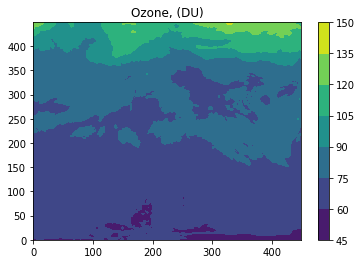

In [2]:
gas_dobson_units = compute_gas_dobson_units(p_data, t_data, dz, ozone_ppmv)
plt.figure()
plt.contourf(gas_dobson_units)
plt.colorbar()
plt.title('Ozone, (DU)')

Text(0.5, 1.0, '$SO_2$, (DU)')

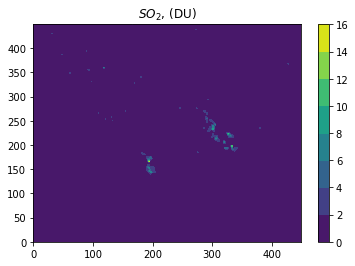

In [3]:
gas_dobson_units = compute_gas_dobson_units(p_data, t_data, dz, so2_ppmv)
plt.figure()
plt.contourf(gas_dobson_units)
plt.colorbar()
plt.title('$SO_2$, (DU)')
